In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ResultsMTLAndreuDyadicSimpleall.csv')

In [3]:
df.to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} &                                              Model &                 Age &               Gender &            Ethnicity \\\\\n\\midrule\n0  &                                     Baseline Model &  268.43543374792057 &   0.6792303856382979 &   0.5612948803191489 \\\\\n1  &                     HPS 1 shared layers age gender &   305.8343805069619 &    0.731748670212766 &                    - \\\\\n2  &                     HPS 2 shared layers age gender &  246.91822922483402 &   0.5989029255319149 &                    - \\\\\n3  &                     HPS 3 shared layers age gender &  234.87064817306845 &   0.6412815824468086 &                    - \\\\\n4  &                     HPS 4 shared layers age gender &  489.92812257320327 &   0.5733710106382979 &                    - \\\\\n5  &                     HPS 5 shared layers age gender &  284.55191313155154 &  0.45482047904045025 &                    - \\\\\n6  &                  HPS 1 shared layers 

In [4]:
df = df.replace('-', 999)

In [5]:
df[df['Age'].astype(float) < 88.38889235876233]

,Model,Age,Gender,Ethnicity


In [6]:
bas_results = df[:1]

In [7]:
bas_results

,Model,Age,Gender,Ethnicity
0,Baseline Model,268.43543374792057,0.6792303856382979,0.5612948803191489


In [8]:
age_bas = 268.43
gen_bas = 0.67923
eth_bas = 0.56129

## Hard Param Sharing

In [9]:
hard_results = df[1:41]

In [10]:
hard_results

,Model,Age,Gender,Ethnicity
1,HPS 1 shared layers age gender,305.8343805069619,0.731748670212766,999
2,HPS 2 shared layers age gender,246.91822922483402,0.5989029255319149,999
3,HPS 3 shared layers age gender,234.87064817306845,0.6412815824468086,999
4,HPS 4 shared layers age gender,489.92812257320327,0.5733710106382979,999
5,HPS 5 shared layers age gender,284.55191313155154,0.45482047904045025,999
6,HPS 1 shared layers age ethnicity,235.98213093940248,999,0.4797124332570015
7,HPS 2 shared layers age ethnicity,299.0226163701808,999,0.5355884307242454
8,HPS 3 shared layers age ethnicity,406.2323369087057,999,0.5171376333591786
9,HPS 4 shared layers age ethnicity,524.2720912811603,999,0.3702293884246907
10,HPS 5 shared layers age ethnicity,317.1037928540656,999,0.43820644934126673


# Which tasks are improved

In [11]:
age_impr = sum(hard_results['Age'].astype(float) < age_bas)/30

In [12]:
gen_impr = (sum(hard_results['Gender'].astype(float) > gen_bas)-10)/30

In [13]:
eth_impr = (sum(hard_results['Ethnicity'].astype(float) > eth_bas)-10)/30

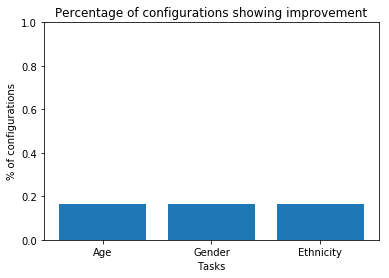

In [14]:
plt.bar(['Age', 'Gender', 'Ethnicity'],[age_impr, gen_impr, eth_impr])
plt.ylim([0,1])
plt.xlabel('Tasks')
plt.ylabel('% of configurations')
plt.title('Percentage of configurations showing improvement')
plt.show()

In [15]:
age_max = min(hard_results['Age'].astype(float))
gen_max = max(hard_results[hard_results['Gender'].astype(float) < 999]['Gender'].astype(float))
eth_max = max(hard_results[hard_results['Ethnicity'].astype(float) < 999]['Ethnicity'].astype(float))

print(age_max, gen_max, eth_max)

234.87064817306845 0.7454953457446809 0.724592752532756


## Backwards or not

In [16]:
hard_norm = hard_results[:20]
hard_back = hard_results[20:]

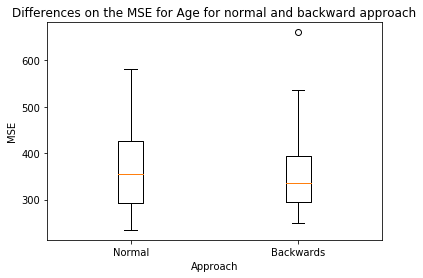

In [17]:
ages_norm = hard_norm[hard_norm['Age'].astype(float) < 999]['Age'].astype(float).values
ages_back = hard_back[hard_back['Age'].astype(float) < 999]['Age'].astype(float).values

plt.boxplot([ages_norm, ages_back], labels=['Normal', 'Backwards'])
plt.title('Differences on the MSE for Age for normal and backward approach')
plt.xlabel('Approach')
plt.ylabel('MSE')
plt.show()

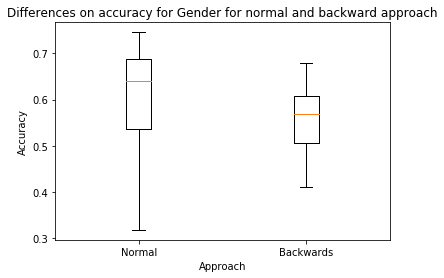

In [18]:
gen_norm = hard_norm[hard_norm['Gender'].astype(float) < 999]['Gender'].astype(float).values
gen_back = hard_back[hard_back['Gender'].astype(float) < 999]['Gender'].astype(float).values

plt.boxplot([gen_norm, gen_back], labels=['Normal', 'Backwards'])
plt.title('Differences on accuracy for Gender for normal and backward approach')
plt.xlabel('Approach')
plt.ylabel('Accuracy')
plt.show()

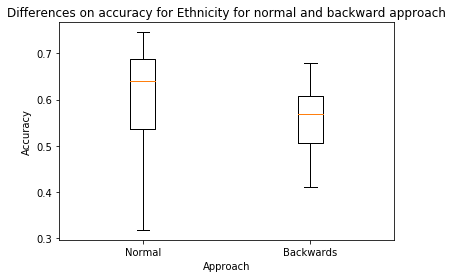

In [19]:
eth_norm = hard_norm[hard_norm['Ethnicity'].astype(float) < 999]['Ethnicity'].astype(float).values
eth_back = hard_back[hard_back['Ethnicity'].astype(float) < 999]['Ethnicity'].astype(float).values

plt.boxplot([gen_norm, gen_back], labels=['Normal', 'Backwards'])
plt.title('Differences on accuracy for Ethnicity for normal and backward approach')
plt.xlabel('Approach')
plt.ylabel('Accuracy')
plt.show()

## Number of units


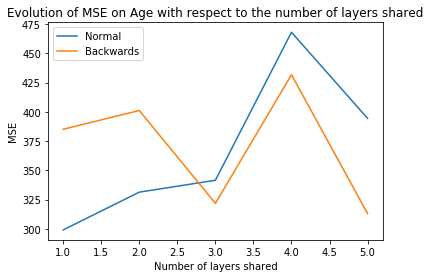

In [20]:

ages_units = [[],[],[],[],[]]
ages_units_back = [[],[],[],[],[]]


for i, elem in enumerate(ages_norm):
    
    ages_units[i%5].append(elem)
    
for i, elem in enumerate(ages_back):
    
    ages_units_back[i%5].append(elem)
    
ages_line_norm = []

ages_line_back = []

for elem in ages_units:
    ages_line_norm.append(sum(elem)/3)

for elem in ages_units_back:
    ages_line_back.append(sum(elem)/3)

plt.plot([1,2,3,4,5], ages_line_norm,  label='Normal')
plt.plot([1,2,3,4,5], ages_line_back, label='Backwards')
plt.legend()
plt.xlabel('Number of layers shared')
plt.ylabel('MSE')
plt.title('Evolution of MSE on Age with respect to the number of layers shared')
plt.show()

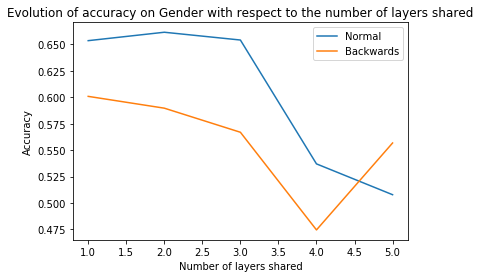

In [21]:
gender_units = [[],[],[],[],[]]
gender_units_back = [[],[],[],[],[]]


for i, elem in enumerate(gen_norm):
    
    gender_units[i%5].append(elem)
    
for i, elem in enumerate(gen_back):
    
    gender_units_back[i%5].append(elem)
    
gender_line_norm = []

gender_line_back = []

for elem in gender_units:
    gender_line_norm.append(sum(elem)/3)

for elem in gender_units_back:
    gender_line_back.append(sum(elem)/3)

plt.plot([1,2,3,4,5], gender_line_norm,  label='Normal')
plt.plot([1,2,3,4,5], gender_line_back, label='Backwards')
plt.legend()
plt.xlabel('Number of layers shared')
plt.ylabel('Accuracy')
plt.title('Evolution of accuracy on Gender with respect to the number of layers shared')
plt.show()

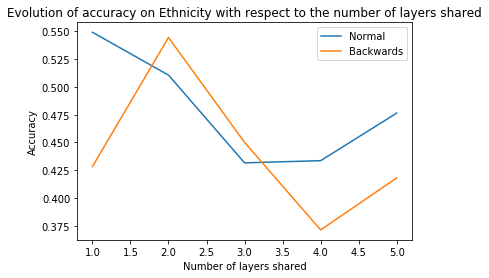

In [22]:
eth_units = [[],[],[],[],[]]
eth_units_back = [[],[],[],[],[]]


for i, elem in enumerate(eth_norm):
    
    eth_units[i%5].append(elem)
    
for i, elem in enumerate(eth_back):
    
    eth_units_back[i%5].append(elem)
    
eth_line_norm = []

eth_line_back = []

for elem in eth_units:
    eth_line_norm.append(sum(elem)/3)

for elem in eth_units_back:
    eth_line_back.append(sum(elem)/3)

plt.plot([1,2,3,4,5], eth_line_norm,  label='Normal')
plt.plot([1,2,3,4,5], eth_line_back, label='Backwards')
plt.legend()
plt.xlabel('Number of layers shared')
plt.ylabel('Accuracy')
plt.title('Evolution of accuracy on Ethnicity with respect to the number of layers shared')
plt.show()

# Cross stitch

In [23]:
cross_results = df[41:]

In [24]:
cross_results

,Model,Age,Gender,Ethnicity
41,CS Network 1 CS units age gender,380.7501469358485,0.5671625669966353,999
42,CS Network 2 CS units age gender,284.11947259294226,0.6866938164893617,999
43,CS Network 3 CS units age gender,509.75857804683926,0.6876329791038595,999
44,CS Network 4 CS units age gender,459.3781740675581,0.5358876329787234,999
45,CS Network 5 CS units age gender,202.55589707963009,0.5177111037234042,999
46,CS Network 1 CS units age ethnicity,302.2609386094073,999,0.5204122343595992
47,CS Network 2 CS units age ethnicity,567.5026041030884,999,0.5606632313829787
48,CS Network 3 CS units age ethnicity,326.49396003155,999,0.5913896276595745
49,CS Network 4 CS units age ethnicity,437.37107095109656,999,0.5088015295723651
50,CS Network 5 CS units age ethnicity,366.6653533205073,999,0.4040226067000247


# Which tasks are improved

In [25]:
age_impr = sum(cross_results['Age'].astype(float) < age_bas)/30

In [26]:
gen_impr = (sum(cross_results['Gender'].astype(float) > gen_bas)-10)/30

In [27]:
eth_impr = (sum(cross_results['Ethnicity'].astype(float) > eth_bas)-10)/30

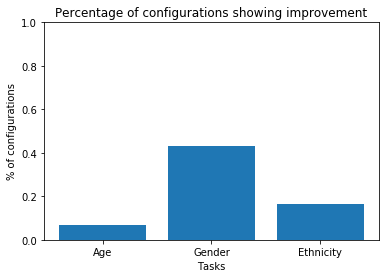

In [28]:
plt.bar(['Age', 'Gender', 'Ethnicity'],[age_impr, gen_impr, eth_impr])
plt.ylim([0,1])
plt.xlabel('Tasks')
plt.ylabel('% of configurations')
plt.title('Percentage of configurations showing improvement')
plt.show()

In [29]:
age_max = min(cross_results['Age'].astype(float))
gen_max = max(cross_results[cross_results['Gender'].astype(float) < 999]['Gender'].astype(float))
eth_max = max(cross_results[cross_results['Ethnicity'].astype(float) < 999]['Ethnicity'].astype(float))

print(age_max, gen_max, eth_max)

202.55589707963009 0.8324800538255813 0.644439827254478


## Backwards or not

In [30]:
cross_norm = cross_results[:20]
cross_back = cross_results[20:]

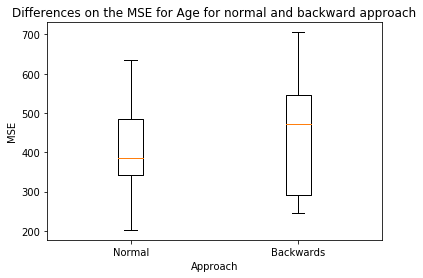

In [31]:
ages_norm = cross_norm[cross_norm['Age'].astype(float) < 999]['Age'].astype(float).values
ages_back = cross_back[cross_back['Age'].astype(float) < 999]['Age'].astype(float).values

plt.boxplot([ages_norm, ages_back], labels=['Normal', 'Backwards'])
plt.title('Differences on the MSE for Age for normal and backward approach')
plt.xlabel('Approach')
plt.ylabel('MSE')
plt.show()

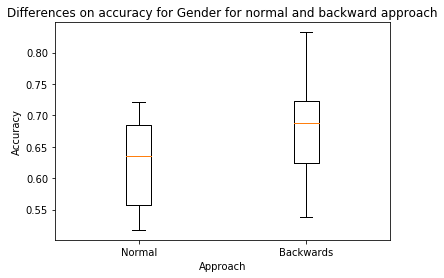

In [32]:
gen_norm = cross_norm[cross_norm['Gender'].astype(float) < 999]['Gender'].astype(float).values
gen_back = cross_back[cross_back['Gender'].astype(float) < 999]['Gender'].astype(float).values

plt.boxplot([gen_norm, gen_back], labels=['Normal', 'Backwards'])
plt.title('Differences on accuracy for Gender for normal and backward approach')
plt.xlabel('Approach')
plt.ylabel('Accuracy')
plt.show()

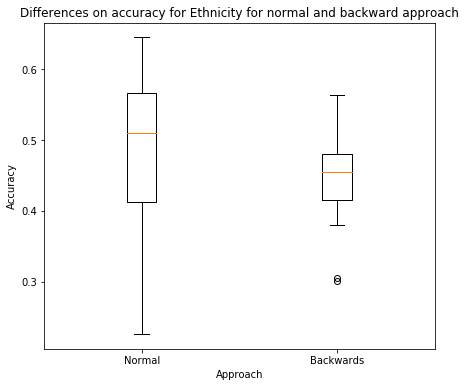

In [33]:
eth_norm = cross_norm[cross_norm['Ethnicity'].astype(float) < 999]['Ethnicity'].astype(float).values
eth_back = cross_back[cross_back['Ethnicity'].astype(float) < 999]['Ethnicity'].astype(float).values

plt.figure(figsize=(7,6))
plt.boxplot([eth_norm, eth_back], labels=['Normal', 'Backwards'])
plt.title('Differences on accuracy for Ethnicity for normal and backward approach')
plt.xlabel('Approach')
plt.ylabel('Accuracy')
plt.show()

## Number of units


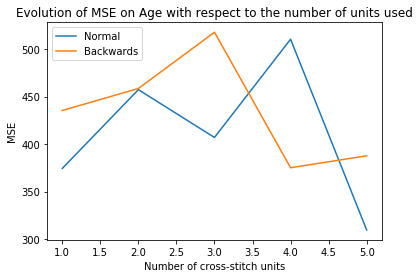

In [34]:

ages_units = [[],[],[],[],[]]
ages_units_back = [[],[],[],[],[]]


for i, elem in enumerate(ages_norm):
    
    ages_units[i%5].append(elem)
    
for i, elem in enumerate(ages_back):
    
    ages_units_back[i%5].append(elem)
    
ages_line_norm = []

ages_line_back = []

for elem in ages_units:
    ages_line_norm.append(sum(elem)/3)

for elem in ages_units_back:
    ages_line_back.append(sum(elem)/3)

plt.plot([1,2,3,4,5], ages_line_norm,  label='Normal')
plt.plot([1,2,3,4,5], ages_line_back, label='Backwards')
plt.legend()
plt.xlabel('Number of cross-stitch units')
plt.ylabel('MSE')
plt.title('Evolution of MSE on Age with respect to the number of units used')
plt.show()

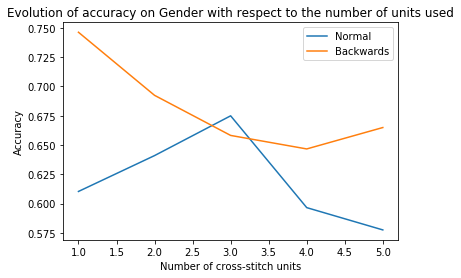

In [35]:
gender_units = [[],[],[],[],[]]
gender_units_back = [[],[],[],[],[]]


for i, elem in enumerate(gen_norm):
    
    gender_units[i%5].append(elem)
    
for i, elem in enumerate(gen_back):
    
    gender_units_back[i%5].append(elem)
    
gender_line_norm = []

gender_line_back = []

for elem in gender_units:
    gender_line_norm.append(sum(elem)/3)

for elem in gender_units_back:
    gender_line_back.append(sum(elem)/3)

plt.plot([1,2,3,4,5], gender_line_norm,  label='Normal')
plt.plot([1,2,3,4,5], gender_line_back, label='Backwards')
plt.legend()
plt.xlabel('Number of cross-stitch units')
plt.ylabel('Accuracy')
plt.title('Evolution of accuracy on Gender with respect to the number of units used')
plt.show()

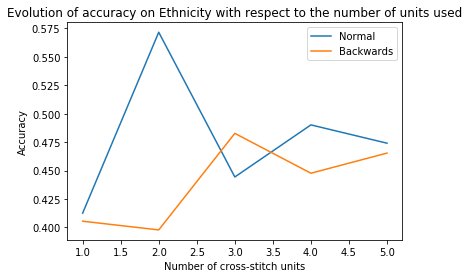

In [36]:
eth_units = [[],[],[],[],[]]
eth_units_back = [[],[],[],[],[]]


for i, elem in enumerate(eth_norm):
    
    eth_units[i%5].append(elem)
    
for i, elem in enumerate(eth_back):
    
    eth_units_back[i%5].append(elem)
    
eth_line_norm = []

eth_line_back = []

for elem in eth_units:
    eth_line_norm.append(sum(elem)/3)

for elem in eth_units_back:
    eth_line_back.append(sum(elem)/3)

plt.plot([1,2,3,4,5], eth_line_norm,  label='Normal')
plt.plot([1,2,3,4,5], eth_line_back, label='Backwards')
plt.legend()
plt.xlabel('Number of cross-stitch units')
plt.ylabel('Accuracy')
plt.title('Evolution of accuracy on Ethnicity with respect to the number of units used')
plt.show()

# Comparison

## In which task which one is best

In [37]:
ages_cross = cross_results[cross_results['Age'].astype(float) < 999]['Age'].astype(float).values
ages_hard = hard_results[hard_results['Age'].astype(float) < 999]['Age'].astype(float).values

gen_cross = cross_results[cross_results['Gender'].astype(float) < 999]['Gender'].astype(float).values
gen_hard = hard_results[hard_results['Gender'].astype(float) < 999]['Gender'].astype(float).values

eth_cross = cross_results[cross_results['Ethnicity'].astype(float) < 999]['Ethnicity'].astype(float).values
eth_hard = hard_results[hard_results['Ethnicity'].astype(float) < 999]['Ethnicity'].astype(float).values



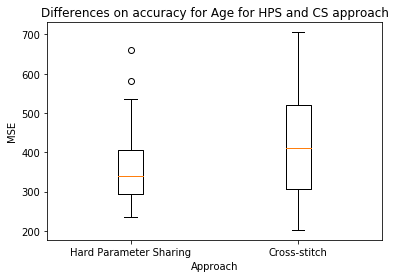

In [55]:
plt.boxplot([ages_hard, ages_cross], labels=['Hard Parameter Sharing', 'Cross-stitch'])
plt.title('Differences on accuracy for Age for HPS and CS approach')
plt.xlabel('Approach')
plt.ylabel('MSE')
plt.show()

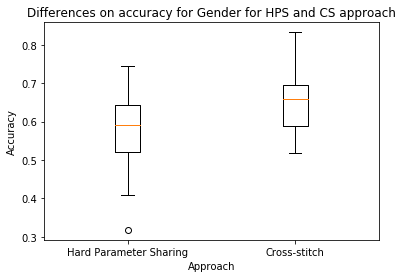

In [39]:
plt.boxplot([gen_hard, gen_cross], labels=['Hard Parameter Sharing', 'Cross-stitch'])
plt.title('Differences on accuracy for Gender for HPS and CS approach')
plt.xlabel('Approach')
plt.ylabel('Accuracy')
plt.show()

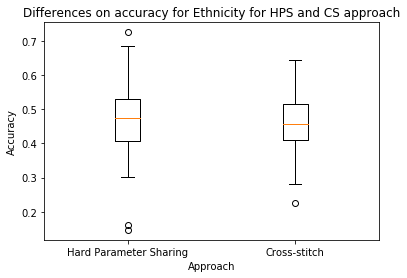

In [40]:
plt.boxplot([eth_hard, eth_cross], labels=['Hard Parameter Sharing', 'Cross-stitch'])
plt.title('Differences on accuracy for Ethnicity for HPS and CS approach')
plt.xlabel('Approach')
plt.ylabel('Accuracy')
plt.show()

## Correlation layers shared and units

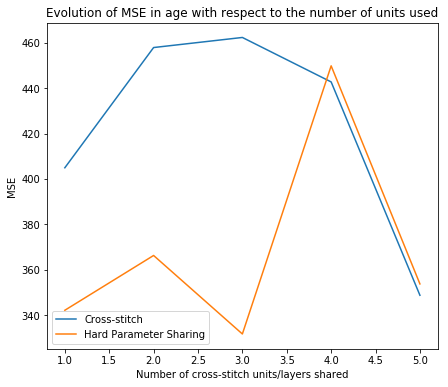

In [41]:
ages_units_cross = [[],[],[],[],[]]
ages_units_hard = [[],[],[],[],[]]


for i, elem in enumerate(ages_cross):
    
    ages_units_cross[i%5].append(elem)
    
for i, elem in enumerate(ages_hard):
    
    ages_units_hard[i%5].append(elem)
    
ages_line_cross = []

ages_line_hard = []

for elem in ages_units_cross:
    ages_line_cross.append(sum(elem)/6)

for elem in ages_units_hard:
    ages_line_hard.append(sum(elem)/6)

plt.figure(figsize=(7,6))
plt.plot([1,2,3,4,5], ages_line_cross,  label='Cross-stitch')
plt.plot([1,2,3,4,5], ages_line_hard, label='Hard Parameter Sharing')
plt.legend()
plt.xlabel('Number of cross-stitch units/layers shared')
plt.ylabel('MSE')
plt.title('Evolution of MSE in age with respect to the number of units used')
plt.show()

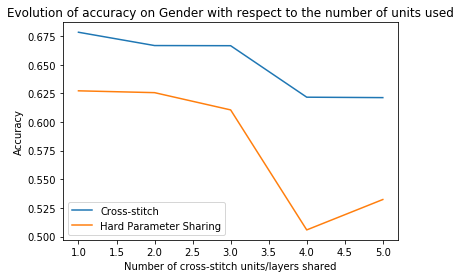

In [42]:
gen_units_cross = [[],[],[],[],[]]
gen_units_hard = [[],[],[],[],[]]


for i, elem in enumerate(gen_cross):
    
    gen_units_cross[i%5].append(elem)
    
for i, elem in enumerate(gen_hard):
    
    gen_units_hard[i%5].append(elem)
    
gen_line_cross = []

gen_line_hard = []

for elem in gen_units_cross:
    gen_line_cross.append(sum(elem)/6)

for elem in gen_units_hard:
    gen_line_hard.append(sum(elem)/6)
    
plt.plot([1,2,3,4,5], gen_line_cross,  label='Cross-stitch')
plt.plot([1,2,3,4,5], gen_line_hard, label='Hard Parameter Sharing')
plt.legend()
plt.xlabel('Number of cross-stitch units/layers shared')
plt.ylabel('Accuracy')
plt.title('Evolution of accuracy on Gender with respect to the number of units used')
plt.show()

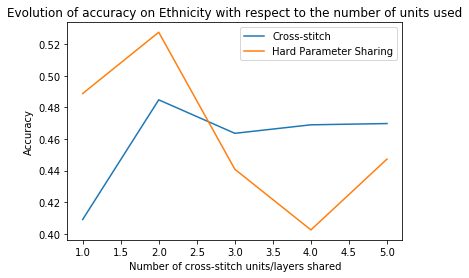

In [43]:
eth_units_cross = [[],[],[],[],[]]
eth_units_hard = [[],[],[],[],[]]


for i, elem in enumerate(eth_cross):
    
    eth_units_cross[i%5].append(elem)
    
for i, elem in enumerate(eth_hard):
    
    eth_units_hard[i%5].append(elem)
    
eth_line_cross = []

eth_line_hard = []

for elem in eth_units_cross:
    eth_line_cross.append(sum(elem)/6)

for elem in eth_units_hard:
    eth_line_hard.append(sum(elem)/6)
    
plt.plot([1,2,3,4,5], eth_line_cross,  label='Cross-stitch')
plt.plot([1,2,3,4,5], eth_line_hard, label='Hard Parameter Sharing')
plt.legend()
plt.xlabel('Number of cross-stitch units/layers shared')
plt.ylabel('Accuracy')
plt.title('Evolution of accuracy on Ethnicity with respect to the number of units used')
plt.show()

## Taskonomy

In [44]:
ages = df[df['Age'].astype(float) < 999][1:]

In [45]:
ages_gender = ages[ages['Gender'].astype(float) < 999][ages['Ethnicity'].astype(float) == 999]['Age'].astype(float).values
ages_ethnicity = ages[ages['Ethnicity'].astype(float) < 999][ages['Gender'].astype(float) == 999]['Age'].astype(float).values
ages_3t = ages[ages['Gender'].astype(float) < 999][ages['Ethnicity'].astype(float) < 999]['Age'].astype(float).values

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


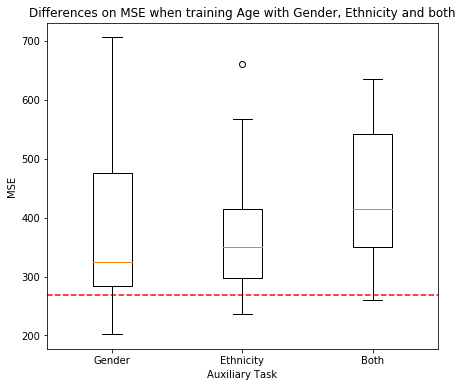

In [46]:
plt.figure(figsize=(7,6))
plt.axhline(y=age_bas, color='r', linestyle='--')
plt.boxplot([ages_gender, ages_ethnicity, ages_3t], labels=['Gender', 'Ethnicity', 'Both'])
plt.title('Differences on MSE when training Age with Gender, Ethnicity and both')
plt.xlabel('Auxiliary Task')
plt.ylabel('MSE')
plt.show()

In [47]:
gen = df[df['Gender'].astype(float) < 999][1:]

gen_ages = gen[gen['Age'].astype(float) < 999][gen['Ethnicity'].astype(float) == 999]['Gender'].astype(float).values
gen_ethnicity = gen[gen['Ethnicity'].astype(float) < 999][gen['Age'].astype(float) == 999]['Gender'].astype(float).values
gen_3t = gen[gen['Age'].astype(float) < 999][gen['Ethnicity'].astype(float) < 999]['Gender'].astype(float).values

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


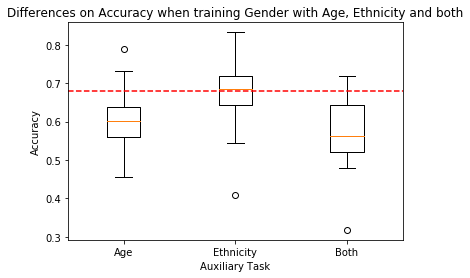

In [51]:
plt.boxplot([gen_ages, gen_ethnicity, gen_3t], labels=['Age', 'Ethnicity', 'Both'])
plt.axhline(y=gen_bas, color='r', linestyle='--')

plt.title('Differences on Accuracy when training Gender with Age, Ethnicity and both')
plt.xlabel('Auxiliary Task')
plt.ylabel('Accuracy')
plt.show()

In [53]:
eth = df[df['Ethnicity'].astype(float) < 999][1:]

eth_ages = eth[eth['Age'].astype(float) < 999][eth['Gender'].astype(float) == 999]['Ethnicity'].astype(float).values
eth_gen = eth[eth['Gender'].astype(float) < 999][eth['Age'].astype(float) == 999]['Ethnicity'].astype(float).values
eth_3t = eth[eth['Age'].astype(float) < 999][eth['Gender'].astype(float) < 999]['Ethnicity'].astype(float).values

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


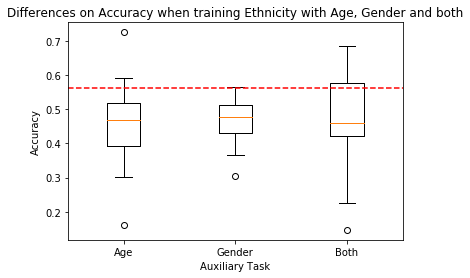

In [54]:
plt.boxplot([eth_ages, eth_gen, eth_3t], labels=['Age', 'Gender', 'Both'])
plt.axhline(y=eth_bas, color='r', linestyle='--')

plt.title('Differences on Accuracy when training Ethnicity with Age, Gender and both')
plt.xlabel('Auxiliary Task')
plt.ylabel('Accuracy')
plt.show()